In [ ]:
import io
import numpy as np
import pandas as pd
import math
from google.colab import files
import plotly.graph_objects as go
from matplotlib import pyplot as plt
import seaborn as sns

# SMP


In [ ]:
uploaded = files.upload()

Saving smp_2020.xlsx to smp_2020.xlsx


In [ ]:
df = pd.read_excel(io.BytesIO(uploaded.get('smp_2020.xlsx')))
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,מחירי 2020 - SMP,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,אינטרווליים של חצי שעה,NaN,NaN,NaN,NaN,NaN,NaN
1,הערה: נתונים אלו מבוססים על עיבוד של נתונים המ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,תאריך,חצי שעה,SMP,is_weekend,is_holiday,NaN,ערך,SMP (₪)
4,NaN,NaN,01/01/2020,00:00,159.16,0,0,NaN,ממוצע,134.040837
...,...,...,...,...,...,...,...,...,...,...
17567,NaN,NaN,2020-12-31 00:00:00,21:30,125.9,0,0,NaN,NaN,NaN
17568,NaN,NaN,2020-12-31 00:00:00,22:00,127.37,0,0,NaN,NaN,NaN
17569,NaN,NaN,2020-12-31 00:00:00,22:30,123,0,0,NaN,NaN,NaN
17570,NaN,NaN,2020-12-31 00:00:00,23:00,105,0,0,NaN,NaN,NaN


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Unnamed: 0             17571
Unnamed: 1             17572
Unnamed: 2                 3
מחירי  2020   - SMP        2
Unnamed: 4                 3
Unnamed: 5                 3
Unnamed: 6                 3
Unnamed: 7             17572
Unnamed: 8             17559
Unnamed: 9             17566
dtype: int64

In [ ]:
smp_df = df[['Unnamed: 2','מחירי  2020   - SMP','Unnamed: 4','Unnamed: 5','Unnamed: 6']]
smp_df.columns = ['date','half_hour','SMP','is_weekend','is_holliday']
smp_df.head()

,date,half_hour,SMP,is_weekend,is_holliday
0,NaN,אינטרווליים של חצי שעה,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,תאריך,חצי שעה,SMP,is_weekend,is_holiday
4,01/01/2020,00:00,159.16,0,0


In [ ]:
smp_df = smp_df.copy()
smp_df.dropna(axis=0,how='any',inplace=True)
smp_df.head()

,date,half_hour,SMP,is_weekend,is_holliday
3,תאריך,חצי שעה,SMP,is_weekend,is_holiday
4,01/01/2020,00:00,159.16,0,0
5,01/01/2020,00:30,148.74,0,0
6,01/01/2020,01:00,147.01,0,0
7,01/01/2020,01:30,141.16,0,0


In [ ]:
smp_df.drop(axis=0,index=3,inplace=True)
smp_df.reset_index(drop=True,inplace=True)
smp_df.head()

,date,half_hour,SMP,is_weekend,is_holliday
0,01/01/2020,00:00,159.16,0,0
1,01/01/2020,00:30,148.74,0,0
2,01/01/2020,01:00,147.01,0,0
3,01/01/2020,01:30,141.16,0,0
4,01/01/2020,02:00,128.43,0,0


In [ ]:
smp_df.dtypes

date           object
half_hour      object
SMP            object
is_weekend     object
is_holliday    object
dtype: object

In [ ]:
smp_df["date"] = pd.to_datetime(smp_df["date"])
smp_df = smp_df.astype({'SMP':'float64','is_weekend':'int','is_holliday':'int'})


In [ ]:
smp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17568 entries, 0 to 17567
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         17568 non-null  datetime64[ns]
 1   half_hour    17568 non-null  object        
 2   SMP          17568 non-null  float64       
 3   is_weekend   17568 non-null  int64         
 4   is_holliday  17568 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 686.4+ KB


In [ ]:
smp_df.isnull().sum()

date           0
half_hour      0
SMP            0
is_weekend     0
is_holliday    0
dtype: int64

In [ ]:
smp_df.describe()

,SMP,is_weekend,is_holliday
count,17568.000000,17568.000000,17568.000000
mean,134.040837,0.284153,0.051913
std,23.766987,0.451023,0.221857
min,82.000000,0.000000,0.000000
25%,116.000000,0.000000,0.000000
50%,121.710000,0.000000,0.000000
75%,157.910000,1.000000,0.000000
max,240.340000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
scaled_smp_df = pd.DataFrame(standard_scaler.fit_transform(smp_df[['SMP']]), columns=['SMP'])
scaled_smp_df

,SMP
0,1.056923
1,0.618487
2,0.545695
3,0.299548
4,-0.236084
...,...
17563,-0.342537
17564,-0.280685
17565,-0.464558
17566,-1.221933


In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(name='smp', y=scaled_smp_df.SMP))

fig.update_traces(
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2)),
    line_color='rgb(8,81,156)'
)
fig.show()

In [ ]:
def get_outliers(df, series):
  q1 = series.quantile(0.25)
  q3 = series.quantile(0.75)

  if q1*q3 == 0:
    iqr = abs(2*(q1+q3))
    toprange = iqr
    botrange = -toprange
  else:
    iqr = q3-q1
    toprange = q3 + iqr * 1.5
    botrange = q1 - iqr * 1.5

  outliers_top=df[series > toprange]
  outliers_bot= df[series < botrange]
  outliers = pd.concat([outliers_bot, outliers_top], axis=0)

  return (botrange, toprange, outliers)

In [ ]:
botrange, toprange, outliers = get_outliers(scaled_smp_df,scaled_smp_df.SMP)
print(toprange)
print(botrange)

outliers.head()

3.6494584267767385
-3.4042236720159624


,SMP
1337,3.708996
4934,3.681226
5128,3.692587
6652,3.760750
6653,4.084318


In [ ]:
len(outliers)

46

# סגר 1

In [ ]:
uploaded = files.upload()

Saving seger1.xlsx to seger1.xlsx


In [ ]:
seger1_df = pd.read_excel(io.BytesIO(uploaded.get('seger1.xlsx')))
seger1_df

,date,lockdown
0,2020-03-18,1
1,2020-03-19,1
2,2020-03-20,1
3,2020-03-21,1
4,2020-03-22,1
5,2020-03-23,1
6,2020-03-24,1
7,2020-03-25,1
8,2020-03-26,1
9,2020-03-27,1


In [ ]:
smp_lock1 = pd.merge(left=smp_df, right=seger1_df, left_on='date', right_on='date', how='left')

In [ ]:
smp_lock1.head()

,date,half_hour,SMP,is_weekend,is_holliday,lockdown
0,2020-01-01,00:00,159.16,0,0,NaN
1,2020-01-01,00:30,148.74,0,0,NaN
2,2020-01-01,01:00,147.01,0,0,NaN
3,2020-01-01,01:30,141.16,0,0,NaN
4,2020-01-01,02:00,128.43,0,0,NaN


In [ ]:
smp_lock1['lockdown'] = smp_lock1['lockdown'].apply(lambda x: 1 if not pd.isnull(x) else 0)

In [ ]:
seger1 = smp_lock1.loc[smp_lock1['lockdown']==1]
noseger1 = smp_lock1.loc[smp_lock1['lockdown']==0]
noseger1.drop('lockdown',axis=1,inplace=True)
seger1.reset_index(drop=True,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# סגר 2

In [ ]:
uploaded = files.upload()

Saving seger2.xlsx to seger2.xlsx


In [ ]:
seger2_df = pd.read_excel(io.BytesIO(uploaded.get('seger2.xlsx')))
seger2_df

,date,lockdown
0,2020-09-18,1
1,2020-09-19,1
2,2020-09-20,1
3,2020-09-21,1
4,2020-09-22,1
5,2020-09-23,1
6,2020-09-24,1
7,2020-09-25,1
8,2020-09-26,1
9,2020-09-27,1


In [ ]:
smp_lock2 = pd.merge(left=noseger1, right=seger2_df, left_on='date', right_on='date', how='left')

In [ ]:
smp_lock2['lockdown'] = smp_lock2['lockdown'].apply(lambda x: 1 if not pd.isnull(x) else 0)

In [ ]:
seger2 = smp_lock2.loc[smp_lock2['lockdown']==1]
noseger = smp_lock2.loc[smp_lock2['lockdown']==0]
noseger.drop('lockdown',axis=1,inplace=True)
seger2.reset_index(drop=True,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
seger2

,date,half_hour,SMP,is_weekend,is_holliday,lockdown
0,2020-09-18,00:00,163.46,1,1,1
1,2020-09-18,00:30,162.43,1,1,1
2,2020-09-18,01:00,140.00,1,1,1
3,2020-09-18,01:30,121.90,1,1,1
4,2020-09-18,02:00,123.14,1,1,1
...,...,...,...,...,...,...
1435,2020-10-17,21:30,158.00,1,0,1
1436,2020-10-17,22:00,158.00,1,0,1
1437,2020-10-17,22:30,158.00,1,0,1
1438,2020-10-17,23:00,158.00,1,0,1


In [ ]:
seger2.describe()

,SMP,is_weekend,is_holliday,lockdown
count,1440.000000,1440.000000,1440.000000,1440.0
mean,140.301632,0.333333,0.366667,1.0
std,22.574422,0.471568,0.482062,0.0
min,106.030000,0.000000,0.000000,1.0
25%,117.612500,0.000000,0.000000,1.0
50%,144.345000,0.000000,0.000000,1.0
75%,161.320000,1.000000,1.000000,1.0
max,181.160000,1.000000,1.000000,1.0


In [ ]:
smp_df['lockdown'] =  smp_df['date'].apply(lambda x: 1 if ((str(x) >= '2020-03-18' and str(x) <= '2020-04-25') or (str(x) >= '2020-09-18' and str(x) <= '2020-10-18')) else 0)

# טמפרטורה

In [ ]:
uploaded = files.upload()

Saving tmp_2020.xlsx to tmp_2020.xlsx


In [ ]:
tmp_df = pd.read_excel(io.BytesIO(uploaded.get('tmp_2020.xlsx')))
tmp_df

,date,half_hour,tmp,hour_num
0,2020-01-01,00:00,NaN,0.0
1,2020-01-01,00:30,NaN,0.5
2,2020-01-01,01:00,NaN,1.0
3,2020-01-01,01:30,NaN,1.5
4,2020-01-01,02:00,11.4,2.0
...,...,...,...,...
17563,2020-12-31,21:30,NaN,21.5
17564,2020-12-31,22:00,NaN,22.0
17565,2020-12-31,22:30,NaN,22.5
17566,2020-12-31,23:00,15.2,23.0


In [ ]:
smp_tmp = pd.merge(left=smp_df, right=tmp_df, left_on=['date','half_hour'], right_on=['date','half_hour'], how='inner')
smp_tmp

,date,half_hour,SMP,is_weekend,is_holliday,lockdown,tmp,hour_num
0,2020-01-01,00:00,159.16,0,0,0,NaN,0.0
1,2020-01-01,00:30,148.74,0,0,0,NaN,0.5
2,2020-01-01,01:00,147.01,0,0,0,NaN,1.0
3,2020-01-01,01:30,141.16,0,0,0,NaN,1.5
4,2020-01-01,02:00,128.43,0,0,0,11.4,2.0
...,...,...,...,...,...,...,...,...
17563,2020-12-31,21:30,125.90,0,0,0,NaN,21.5
17564,2020-12-31,22:00,127.37,0,0,0,NaN,22.0
17565,2020-12-31,22:30,123.00,0,0,0,NaN,22.5
17566,2020-12-31,23:00,105.00,0,0,0,15.2,23.0


In [ ]:
smp_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17568 entries, 0 to 17567
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         17568 non-null  datetime64[ns]
 1   half_hour    17568 non-null  object        
 2   SMP          17568 non-null  float64       
 3   is_weekend   17568 non-null  int64         
 4   is_holliday  17568 non-null  int64         
 5   lockdown     17568 non-null  int64         
 6   tmp          2928 non-null   float64       
 7   hour_num     17568 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 1.2+ MB


In [ ]:
smp_tmp['tmp_new'] = smp_tmp.tmp.interpolate(method='index')
smp_tmp

,date,half_hour,SMP,is_weekend,is_holliday,lockdown,tmp,hour_num,tmp_new
0,2020-01-01,00:00,159.16,0,0,0,NaN,0.0,NaN
1,2020-01-01,00:30,148.74,0,0,0,NaN,0.5,NaN
2,2020-01-01,01:00,147.01,0,0,0,NaN,1.0,NaN
3,2020-01-01,01:30,141.16,0,0,0,NaN,1.5,NaN
4,2020-01-01,02:00,128.43,0,0,0,11.4,2.0,11.400000
...,...,...,...,...,...,...,...,...,...
17563,2020-12-31,21:30,125.90,0,0,0,NaN,21.5,16.150000
17564,2020-12-31,22:00,127.37,0,0,0,NaN,22.0,15.833333
17565,2020-12-31,22:30,123.00,0,0,0,NaN,22.5,15.516667
17566,2020-12-31,23:00,105.00,0,0,0,15.2,23.0,15.200000


In [ ]:
smp_tmp.drop('tmp', axis=1, inplace=True)
smp_tmp

,date,half_hour,SMP,is_weekend,is_holliday,lockdown,hour_num,tmp_new
0,2020-01-01,00:00,159.16,0,0,0,0.0,NaN
1,2020-01-01,00:30,148.74,0,0,0,0.5,NaN
2,2020-01-01,01:00,147.01,0,0,0,1.0,NaN
3,2020-01-01,01:30,141.16,0,0,0,1.5,NaN
4,2020-01-01,02:00,128.43,0,0,0,2.0,11.400000
...,...,...,...,...,...,...,...,...
17563,2020-12-31,21:30,125.90,0,0,0,21.5,16.150000
17564,2020-12-31,22:00,127.37,0,0,0,22.0,15.833333
17565,2020-12-31,22:30,123.00,0,0,0,22.5,15.516667
17566,2020-12-31,23:00,105.00,0,0,0,23.0,15.200000


In [ ]:
smp_tmp.fillna(value=11.4,inplace=True)

In [ ]:
smp_tmp.tmp_new = round(smp_tmp.tmp_new , ndigits=2)
smp_tmp

,date,half_hour,SMP,is_weekend,is_holliday,lockdown,hour_num,tmp_new
0,2020-01-01,00:00,159.16,0,0,0,0.0,11.40
1,2020-01-01,00:30,148.74,0,0,0,0.5,11.40
2,2020-01-01,01:00,147.01,0,0,0,1.0,11.40
3,2020-01-01,01:30,141.16,0,0,0,1.5,11.40
4,2020-01-01,02:00,128.43,0,0,0,2.0,11.40
...,...,...,...,...,...,...,...,...
17563,2020-12-31,21:30,125.90,0,0,0,21.5,16.15
17564,2020-12-31,22:00,127.37,0,0,0,22.0,15.83
17565,2020-12-31,22:30,123.00,0,0,0,22.5,15.52
17566,2020-12-31,23:00,105.00,0,0,0,23.0,15.20


In [ ]:
corr_df = smp_tmp.corr()
corr_df

,SMP,is_weekend,is_holliday,lockdown,hour_num,tmp_new
SMP,1.000000,-3.489043e-02,-1.020932e-02,-3.883762e-02,4.156310e-01,0.005032
is_weekend,-0.034890,1.000000e+00,4.372087e-02,2.612994e-02,-2.046370e-17,-0.012426
is_holliday,-0.010209,4.372087e-02,1.000000e+00,4.898530e-01,-4.666649e-16,0.059287
lockdown,-0.038838,2.612994e-02,4.898530e-01,1.000000e+00,-3.221641e-16,0.030591
hour_num,0.415631,-2.046370e-17,-4.666649e-16,-3.221641e-16,1.000000e+00,0.121991
tmp_new,0.005032,-1.242562e-02,5.928732e-02,3.059061e-02,1.219907e-01,1.000000


In [ ]:
fig = go.Figure()
fig.add_traces(go.Heatmap(
    z=corr_df, 
    x=corr_df.columns, 
    y=corr_df.columns,
    zmax=1, 
    zmin=-1
))

In [ ]:
smp_tmp

,date,half_hour,SMP,is_weekend,is_holliday,lockdown,hour_num,tmp_new
0,2020-01-01,00:00,159.16,0,0,0,0.0,11.40
1,2020-01-01,00:30,148.74,0,0,0,0.5,11.40
2,2020-01-01,01:00,147.01,0,0,0,1.0,11.40
3,2020-01-01,01:30,141.16,0,0,0,1.5,11.40
4,2020-01-01,02:00,128.43,0,0,0,2.0,11.40
...,...,...,...,...,...,...,...,...
17563,2020-12-31,21:30,125.90,0,0,0,21.5,16.15
17564,2020-12-31,22:00,127.37,0,0,0,22.0,15.83
17565,2020-12-31,22:30,123.00,0,0,0,22.5,15.52
17566,2020-12-31,23:00,105.00,0,0,0,23.0,15.20


In [ ]:
seger = smp_tmp.loc[smp_tmp['lockdown']==1]
noseger = smp_tmp.loc[smp_tmp['lockdown']==0]
seger.drop('lockdown',axis=1,inplace=True)
noseger.drop('lockdown',axis=1,inplace=True)
seger.reset_index(drop='index',inplace=True)
noseger.reset_index(drop='index',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Data visualization

In [ ]:
dates = pd.pivot_table(data=smp_df, index=['date'], aggfunc='sum')
dates 

,SMP,is_holliday,is_weekend,lockdown
date,,,,
2020-01-01,7154.92,0,0,0
2020-01-02,7483.48,0,0,0
2020-01-03,6231.80,0,48,0
2020-01-04,7580.70,0,48,0
2020-01-05,7333.68,0,0,0
...,...,...,...,...
2020-12-27,5823.94,0,0,0
2020-12-28,5682.39,0,0,0
2020-12-29,5785.96,0,0,0


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dates.index, y=dates.SMP,
                    mode='lines+markers',
                    name='total',
                    marker_color='blue'
                    ))

fig.update_layout(
    title="Total by Date",
    xaxis_title="Date",
    yaxis_title="Daily Total",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    )
)

fig.show()

In [ ]:
date_mean = smp_df.groupby(by='date').mean()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(name='SMP', x=date_mean.index, y=date_mean.SMP, marker_color='pink'))
fig.update_layout(
    barmode='group',
    title='SMP mean by dates', 
    yaxis_title='dates')
fig.show()

Text(0.5, 1.0, 'SMP during lockdown 2')

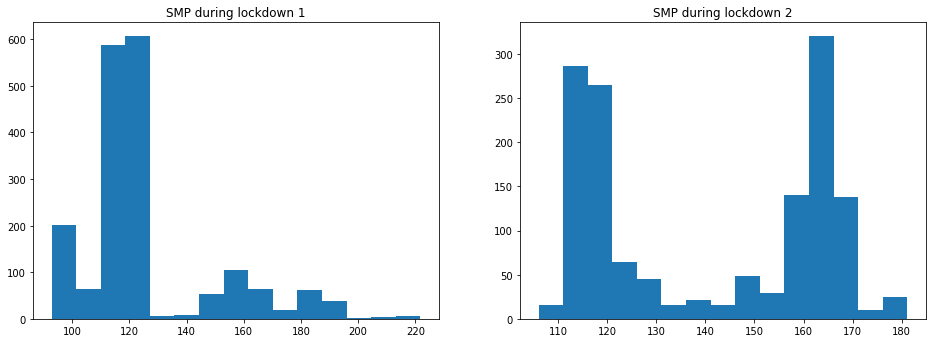

In [ ]:
plt.figure(figsize=(16,12))
plt.subplot(2,2,1)

plt.hist(seger1['SMP'], bins = 15)

plt.title('SMP during lockdown 1')

plt.subplot(2,2,2)

plt.hist(seger2['SMP'], bins = 15)

plt.title('SMP during lockdown 2')



In [ ]:
pivot_seger1 = pd.pivot_table(data=seger1, index=['date'], aggfunc='sum')
pivot_seger2 = pd.pivot_table(data=seger2, index=['date'], aggfunc='sum')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=pivot_seger1.index, y=pivot_seger1.SMP,
                    mode='lines+markers',
                    name='total',
                    marker_color='blue'
                    ))

fig.update_layout(
    title="Total SMP during lockdown 1 by Date",
    xaxis_title="Date",
    yaxis_title="Daily Total",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    )
)

fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=pivot_seger2.index, y=pivot_seger2.SMP,
                    mode='lines+markers',
                    name='total',
                    marker_color='blue'
                    ))

fig.update_layout(
    title="Total SMP during lockdown 2 by Date",
    xaxis_title="Date",
    yaxis_title="Daily Total",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="RebeccaPurple"
    )
)

fig.show()

In [ ]:
tt = pd.pivot_table(data=seger1, index=['is_weekend'], values=['SMP'])
tt.reset_index(inplace=True)
tt.SMP = round(tt.SMP,2)
aa = pd.pivot_table(data=seger2, index=['is_weekend'], values=['SMP'])
aa.reset_index(inplace=True)
aa.SMP = round(aa.SMP,2)

Text(0.5, 1.0, 'Lockdown 2')

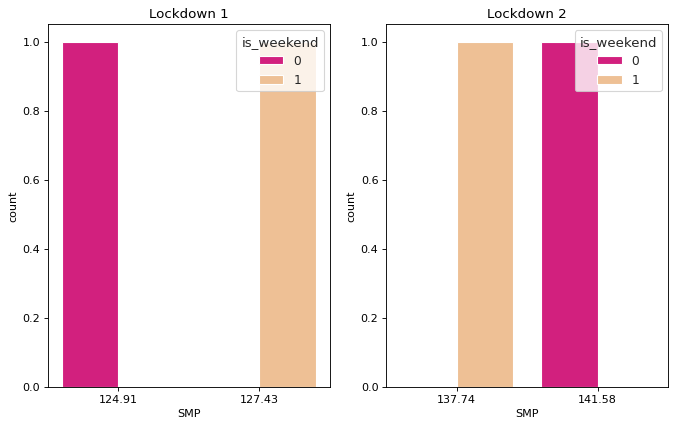

In [ ]:
import itertools
fig, axarr = plt.subplots(1, 2, figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')
sns.set(style="white")
sns.countplot(x='SMP', hue = 'is_weekend',data = tt , ax=axarr[0], palette="Accent_r")
axarr[0].set_title('Lockdown 1')
sns.countplot(x='SMP', hue = 'is_weekend',data = aa , ax=axarr[1], palette="Accent_r")
axarr[1].set_title('Lockdown 2')

In [ ]:
tt = pd.pivot_table(data=seger1, index=['is_holliday'], values=['SMP'])
tt.reset_index(inplace=True)
tt.SMP = round(tt.SMP,2)
aa = pd.pivot_table(data=seger2, index=['is_holliday'], values=['SMP'])
aa.reset_index(inplace=True)
aa.SMP = round(aa.SMP,2)

Text(0.5, 1.0, 'Lockdown 2')

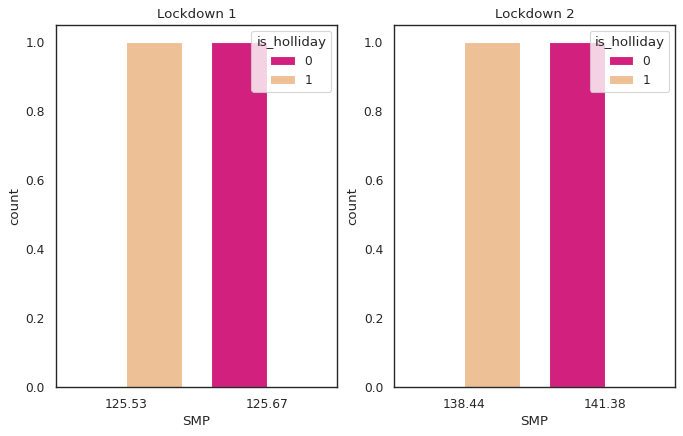

In [ ]:
fig, axarr = plt.subplots(1, 2, figsize=(10,6), dpi=80, facecolor='w', edgecolor='k')
sns.set(style="white")
sns.countplot(x='SMP', hue = 'is_holliday',data = tt , ax=axarr[0], palette="Accent_r")
axarr[0].set_title('Lockdown 1')
sns.countplot(x='SMP', hue = 'is_holliday',data = aa , ax=axarr[1], palette="Accent_r")
axarr[1].set_title('Lockdown 2')

In [ ]:
smp_tmp['hour_cut'] = pd.cut(smp_tmp.hour_num, 
                    bins=[0,4,8,12,16,20,24], 
                    right=False,
                    include_lowest=True, 
                    labels=['Night','EarlyMorning','Morning','Noon','Afternoon','Evening'])
seger['hour_cut'] = pd.cut(seger.hour_num, 
                    bins=[0,4,8,12,16,20,24], 
                    right=False,
                    include_lowest=True, 
                    labels=['Night','EarlyMorning','Morning','Noon','Afternoon','Evening'])
noseger['hour_cut'] = pd.cut(noseger.hour_num, 
                    bins=[0,4,8,12,16,20,24],
                    right=False, 
                    include_lowest=True, 
                    labels=['Night','EarlyMorning','Morning','Noon','Afternoon','Evening'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
hour1 = smp_tmp.groupby(by= 'hour_cut').mean()
hour1 = hour1.nlargest(10, 'SMP')
hour1['SMP'] = hour1['SMP'].fillna(0).astype(int)
hour2 = seger.groupby(by= 'hour_cut').mean()
hour2 = hour2.nlargest(10, 'SMP')
hour2['SMP'] = hour2['SMP'].fillna(0).astype(int)
hour3 = noseger.groupby(by= 'hour_cut').mean()
hour3 = hour3.nlargest(10, 'SMP')
hour3['SMP'] = hour3['SMP'].fillna(0).astype(int)

In [ ]:
fig = go.Figure(go.Bar(
            x=hour1.SMP,
            y=hour1.index,
            orientation='h',marker_color='#7F003F' ,text=hour1.SMP,
    textposition='outside' ))
fig.update_layout(title={
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},titlefont_size= 25,title_text='SMP by hour - Israel, Whole period')
fig.update_traces(textfont_size=20,textangle=0,textposition="inside", cliponaxis=False)
fig.update_yaxes(tickfont_size=20,categoryorder='total ascending')
fig.update_xaxes(tickfont_size=20)

fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x=hour2.SMP,
            y=hour2.index,
            orientation='h',marker_color='#7F003F' ,text=hour2.SMP,
    textposition='outside'))
fig.update_layout( title={
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},titlefont_size= 25,title_text='SMP by hour - Israel, Lockdown')

fig.update_traces(textfont_size=20,textangle=0,textposition="inside", cliponaxis=False)
fig.update_yaxes(tickfont_size=20, categoryorder='total ascending')
fig.update_xaxes(tickfont_size=20)
fig.show()

In [ ]:
fig = go.Figure(go.Bar(
            x=hour3.SMP,
            y=hour3.index,
            orientation='h',marker_color='#7F003F' ,text=hour3.SMP,
    textposition='outside' ))
fig.update_layout(title={
        'y':0.86,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},titlefont_size= 25,title_text='SMP by hour - Israel, No lockdown')
fig.update_traces(textfont_size=20,textangle=0,textposition="inside", cliponaxis=False)
fig.update_yaxes(tickfont_size=20,categoryorder='total ascending')
fig.update_xaxes(tickfont_size=20)
fig.show()

# T test
 

In [ ]:
from scipy.stats import ttest_ind
from datetime import timedelta
import datetime
from scipy import stats

In [ ]:
b = smp_df[smp_df.date<'2020-03-18']
b = b[b.date>'2020-03-10']
b=b.SMP.to_numpy()
a = seger1[seger1.date<'2020-03-25']
a = a.SMP.to_numpy()
stat, p = stats.ttest_ind(a, b)
print('stat=%.4f, p=%.4f' % (stat, p))
  # סגר 1 שבוע ושבוע לפניו


stat=-1.5151, p=0.1302


In [ ]:
b = smp_df[smp_df.date<'2020-03-18']
b = b[b.date>'2020-02-16']
b=b.SMP.to_numpy()
a = seger1.loc[:1439]
a = a.SMP.to_numpy()
stat, p = stats.ttest_ind(a, b)
print('stat=%.4f, p=%.4f' % (stat, p))
  # סגר 1 חודש וחודש לפניו


stat=-15.3101, p=0.0000


In [ ]:
b = smp_df[smp_df.date<'2020-09-18']
b = b[b.date>'2020-09-10']
b=b.SMP.to_numpy()
a = seger2[seger2.date<'2020-09-25']
a = a.SMP.to_numpy()
stat, p = stats.ttest_ind(a, b)
print('stat=%.4f, p=%.4f' % (stat, p))
  # סגר 2 שבוע ושבוע לפניו


stat=-3.4416, p=0.0006


In [ ]:
b = smp_df[smp_df.date<'2020-09-18']
b = b[b.date>'2020-08-18']
b=b.SMP.to_numpy()
a = seger2.loc[:1439]
a = a.SMP.to_numpy()
stat, p = stats.ttest_ind(a, b)
print('stat=%.4f, p=%.4f' % (stat, p))
  # סגר 2 חודש וחודש לפניו

stat=-2.3886, p=0.0170


In [ ]:
Dumm = pd.get_dummies(smp_tmp.hour_cut)
smp_tmp = pd.concat([smp_tmp, Dumm], axis=1)
Dumm = pd.get_dummies(seger.hour_cut)
seger = pd.concat([seger, Dumm], axis=1)
Dumm = pd.get_dummies(noseger.hour_cut)
noseger = pd.concat([noseger, Dumm], axis=1)

In [ ]:
smp_tmp = smp_tmp.astype({'Night':'float64','EarlyMorning':'float64','Morning':'float64','Noon':'float64','Afternoon':'float64','Evening':'float64'})
seger = seger.astype({'Night':'float64','EarlyMorning':'float64','Morning':'float64','Noon':'float64','Afternoon':'float64','Evening':'float64'})
noseger = noseger.astype({'Night':'float64','EarlyMorning':'float64','Morning':'float64','Noon':'float64','Afternoon':'float64','Evening':'float64'})

# סגר - מודל רגרסיה


In [ ]:
seger.describe()

,SMP,is_weekend,is_holliday,hour_num,tmp_new,Night,EarlyMorning,Morning,Noon,Afternoon,Evening
count,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000,3264.000000
mean,132.108566,0.308824,0.279412,11.750000,22.158088,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
std,24.337861,0.462079,0.448779,6.927761,5.106350,0.372735,0.372735,0.372735,0.372735,0.372735,0.372735
min,92.780000,0.000000,0.000000,0.000000,9.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,115.680000,0.000000,0.000000,5.875000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,120.160000,0.000000,0.000000,11.750000,21.670000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,160.000000,1.000000,1.000000,17.625000,26.935000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,221.800000,1.000000,1.000000,23.500000,34.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y = seger.SMP
X = seger.drop(['date','half_hour','SMP','hour_num','hour_cut'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)
train_df = pd.merge(left=X_train, right=y_train, left_index=True, right_index=True)
test_df = pd.merge(left=X_test, right=y_test, left_index=True, right_index=True)
train_df.head(10)

,is_weekend,is_holliday,tmp_new,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,SMP
740,0,0,18.17,0.0,0.0,1.0,0.0,0.0,0.0,114.99
2075,0,0,26.18,0.0,1.0,0.0,0.0,0.0,0.0,114.99
2620,0,1,29.10,0.0,0.0,0.0,1.0,0.0,0.0,118.08
448,1,0,21.60,0.0,0.0,1.0,0.0,0.0,0.0,97.00
1467,1,0,19.27,0.0,0.0,0.0,1.0,0.0,0.0,118.54
1540,0,0,18.70,1.0,0.0,0.0,0.0,0.0,0.0,118.16
755,0,0,18.17,0.0,0.0,0.0,0.0,1.0,0.0,116.48
1870,1,1,28.60,0.0,0.0,0.0,0.0,0.0,1.0,160.00
162,1,0,11.20,0.0,0.0,1.0,0.0,0.0,0.0,157.97
2209,1,0,27.15,1.0,0.0,0.0,0.0,0.0,0.0,118.23


In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()  
lm.fit(X_train,y_train)                 

coeff = lm.coef_
intercept = lm.intercept_
print('Coefficients: \n', "coeff =", coeff , ",  Intercept=",intercept,"\n" )
print("The regression equation is:" ,"SMP = " ,intercept," + ",coeff[0]," * ",X.columns[0],
      " + ",coeff[1]," * ",X.columns[1]," + ",coeff[2]," * ",X.columns[2]," + ",coeff[3]," * ",X.columns[3]," + ",coeff[4]," * ",X.columns[4],
     " + ",coeff[5]," * ",X.columns[5]," + ",coeff[6]," * ",X.columns[6]," + ",coeff[7]," * ",X.columns[7]," + ",coeff[8]," * ",X.columns[8] )

Coefficients: 
 coeff = [  0.06244685  -0.08762399   0.95088393 -10.79636049 -14.33955402
 -12.13149391  -0.87894863  16.96964748  21.17670957] ,  Intercept= 111.19253181962216 

The regression equation is: SMP =  111.19253181962216  +  0.06244684815397241  *  is_weekend  +  -0.08762398885897493  *  is_holliday  +  0.9508839276149192  *  tmp_new  +  -10.796360485275848  *  Night  +  -14.339554017954276  *  EarlyMorning  +  -12.131493911488928  *  Morning  +  -0.8789486319774247  *  Noon  +  16.969647475266598  *  Afternoon  +  21.176709571429882  *  Evening


In [ ]:
fitted_scaled_smp = lm.predict(X_train) 
predicted_train_smp = round(pd.Series(fitted_scaled_smp, index= y_train.index, name='predicted_train_smp'), ndigits =2)
train_df = pd.merge(left=train_df, right=predicted_train_smp, left_index=True, right_index=True)
train_df.head(10)

,is_weekend,is_holliday,tmp_new,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,SMP,predicted_train_smp
740,0,0,18.17,0.0,0.0,1.0,0.0,0.0,0.0,114.99,116.34
2075,0,0,26.18,0.0,1.0,0.0,0.0,0.0,0.0,114.99,121.75
2620,0,1,29.10,0.0,0.0,0.0,1.0,0.0,0.0,118.08,137.90
448,1,0,21.60,0.0,0.0,1.0,0.0,0.0,0.0,97.00,119.66
1467,1,0,19.27,0.0,0.0,0.0,1.0,0.0,0.0,118.54,128.70
1540,0,0,18.70,1.0,0.0,0.0,0.0,0.0,0.0,118.16,118.18
755,0,0,18.17,0.0,0.0,0.0,0.0,1.0,0.0,116.48,145.44
1870,1,1,28.60,0.0,0.0,0.0,0.0,0.0,1.0,160.00,159.54
162,1,0,11.20,0.0,0.0,1.0,0.0,0.0,0.0,157.97,109.77
2209,1,0,27.15,1.0,0.0,0.0,0.0,0.0,0.0,118.23,126.28


In [ ]:
fitted_scaled_smp = lm.predict(X_test)
predicted_test_smp = round(pd.Series(fitted_scaled_smp, index=y_test.index, name='Predicted_test_smp'),ndigits=2)
test_df = pd.merge(left=test_df, right=predicted_test_smp, left_index=True, right_index=True)
test_df

,is_weekend,is_holliday,tmp_new,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,SMP,Predicted_test_smp
2161,1,0,26.20,1.0,0.0,0.0,0.0,0.0,0.0,118.69,125.37
2586,1,1,26.20,0.0,0.0,0.0,0.0,0.0,1.0,160.00,157.26
316,0,0,19.50,0.0,0.0,0.0,1.0,0.0,0.0,96.93,128.86
2637,0,1,25.12,0.0,0.0,0.0,0.0,0.0,1.0,131.39,156.17
786,1,0,17.80,0.0,0.0,1.0,0.0,0.0,0.0,120.18,116.05
...,...,...,...,...,...,...,...,...,...,...,...
1102,0,1,17.40,0.0,0.0,0.0,0.0,0.0,1.0,121.13,148.83
1797,1,0,21.32,0.0,0.0,1.0,0.0,0.0,0.0,115.12,119.40
1204,0,1,14.30,1.0,0.0,0.0,0.0,0.0,0.0,119.58,113.91
1860,1,1,29.23,0.0,0.0,0.0,0.0,1.0,0.0,164.39,155.93


In [ ]:
print("Target function std:")
test_df.SMP.std()

Target function std:


24.3593584496451

In [ ]:
print("Target function std:")
train_df.SMP.std()

Target function std:


24.325305473511378

In [ ]:
from sklearn import metrics

print("------ TRAIN DATA ------")

print("RMSE:",np.sqrt(metrics.mean_squared_error(train_df.SMP, train_df.predicted_train_smp)))


------ TRAIN DATA ------
RMSE: 18.803853549704595


In [ ]:
print("------ TEST DATA ------")

print("RMSE:",np.sqrt(metrics.mean_squared_error(test_df.SMP, test_df.Predicted_test_smp)))


------ TEST DATA ------
RMSE: 18.425782092336952


In [ ]:
test_df.describe()

,is_weekend,is_holliday,tmp_new,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,SMP,Predicted_test_smp
count,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000
mean,0.288776,0.269388,22.283949,0.164286,0.169388,0.178571,0.175510,0.164286,0.147959,131.279612,131.774449
std,0.453425,0.443868,5.135805,0.370724,0.375286,0.383189,0.380597,0.370724,0.355241,24.359358,15.004347
min,0.000000,0.000000,9.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.800000,105.950000
25%,0.000000,0.000000,18.065000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,115.040000,119.430000
50%,0.000000,0.000000,21.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,119.725000,126.880000
75%,1.000000,1.000000,27.007500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,159.302500,146.320000
max,1.000000,1.000000,33.380000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,221.530000,159.780000


In [ ]:
from sklearn.metrics import r2_score
r2_score(train_df.SMP, train_df.predicted_train_smp)

0.40218431882045413

In [ ]:
r2_score(test_df.SMP, test_df.Predicted_test_smp)

0.4272520371103693

# בלי סגר - מודל רגרסיה

In [ ]:
noseger.describe()

,SMP,is_weekend,is_holliday,hour_num,tmp_new,Night,EarlyMorning,Morning,Noon,Afternoon,Evening
count,14304.000000,14304.000000,14304.0,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000,14304.000000
mean,134.481758,0.278523,0.0,11.750000,21.723217,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
std,23.613507,0.448288,0.0,6.926942,5.618335,0.372691,0.372691,0.372691,0.372691,0.372691,0.372691
min,82.000000,0.000000,0.0,0.000000,7.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.070000,0.000000,0.0,5.875000,16.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,122.240000,0.000000,0.0,11.750000,22.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,157.430000,1.000000,0.0,17.625000,26.730000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,240.340000,1.000000,0.0,23.500000,34.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y1 = noseger.SMP
X1 = noseger.drop(['date','half_hour','SMP','hour_num','hour_cut'], axis=1)

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1234)
train_df1 = pd.merge(left=X1_train, right=y1_train, left_index=True, right_index=True)
test_df1 = pd.merge(left=X1_test, right=y1_test, left_index=True, right_index=True)
train_df1.head(10)

,is_weekend,is_holliday,tmp_new,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,SMP
657,0,0,17.43,0.0,0.0,0.0,0.0,1.0,0.0,149.98
7516,0,0,29.80,0.0,0.0,0.0,1.0,0.0,0.0,166.02
8704,1,0,27.20,0.0,0.0,1.0,0.0,0.0,0.0,116.62
11261,0,0,26.15,0.0,0.0,0.0,1.0,0.0,0.0,160.00
12271,0,0,23.70,0.0,0.0,0.0,1.0,0.0,0.0,147.10
1851,1,0,15.07,0.0,0.0,0.0,1.0,0.0,0.0,152.39
11262,0,0,26.10,0.0,0.0,0.0,1.0,0.0,0.0,160.00
13248,0,0,16.60,1.0,0.0,0.0,0.0,0.0,0.0,113.83
8619,0,0,30.33,0.0,0.0,0.0,1.0,0.0,0.0,162.29
5504,0,0,23.70,0.0,0.0,0.0,0.0,1.0,0.0,119.12


In [ ]:
lm1 = LinearRegression()  
lm1.fit(X1_train,y1_train)                 

coeff1 = lm1.coef_
intercept1 = lm1.intercept_
print('Coefficients: \n', "coeff =", coeff1 , ",  Intercept=",intercept1,"\n" )
print("The regression equation is:" ,"SMP = " ,intercept1," + ",coeff1[0]," * ",X1.columns[0],
      " + ",coeff1[1]," * ",X1.columns[1]," + ",coeff1[2]," * ",X1.columns[2]," + ",coeff1[3]," * ",X1.columns[3],
      " + ",coeff1[4]," * ",X1.columns[4]," + ",coeff1[5]," * ",X1.columns[5]," + ",coeff1[6]," * ",X1.columns[6],
      " + ",coeff1[7]," * ",X1.columns[7]," + ",coeff1[8]," * ",X1.columns[8])

Coefficients: 
 coeff = [-2.17038046e+00  4.55191440e-15 -4.21661807e-01 -1.09881897e+01
 -1.15963838e+01 -4.92036265e+00  1.99895541e+00  1.51854736e+01
  1.03205071e+01] ,  Intercept= 144.12893802937998 

The regression equation is: SMP =  144.12893802937998  +  -2.170380462713037  *  is_weekend  +  4.551914400963142e-15  *  is_holliday  +  -0.4216618073216871  *  tmp_new  +  -10.988189733866724  *  Night  +  -11.59638377533144  *  EarlyMorning  +  -4.920362654871464  *  Morning  +  1.9989554121761353  *  Noon  +  15.185473616395909  *  Afternoon  +  10.320507135497579  *  Evening


In [ ]:
fitted_scaled_smp1 = lm1.predict(X1_train) 
predicted_train_smp1 = round(pd.Series(fitted_scaled_smp1, index= y1_train.index, name='predicted_train_smp'), ndigits =2)
train_df1 = pd.merge(left=train_df1, right=predicted_train_smp1, left_index=True, right_index=True)
train_df1.head(10)

,is_weekend,is_holliday,tmp_new,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,SMP,predicted_train_smp
657,0,0,17.43,0.0,0.0,0.0,0.0,1.0,0.0,149.98,151.96
7516,0,0,29.80,0.0,0.0,0.0,1.0,0.0,0.0,166.02,133.56
8704,1,0,27.20,0.0,0.0,1.0,0.0,0.0,0.0,116.62,125.57
11261,0,0,26.15,0.0,0.0,0.0,1.0,0.0,0.0,160.00,135.10
12271,0,0,23.70,0.0,0.0,0.0,1.0,0.0,0.0,147.10,136.13
1851,1,0,15.07,0.0,0.0,0.0,1.0,0.0,0.0,152.39,137.60
11262,0,0,26.10,0.0,0.0,0.0,1.0,0.0,0.0,160.00,135.12
13248,0,0,16.60,1.0,0.0,0.0,0.0,0.0,0.0,113.83,126.14
8619,0,0,30.33,0.0,0.0,0.0,1.0,0.0,0.0,162.29,133.34
5504,0,0,23.70,0.0,0.0,0.0,0.0,1.0,0.0,119.12,149.32


In [ ]:
fitted_scaled_smp1 = lm1.predict(X1_test)
predicted_test_smp1 = round(pd.Series(fitted_scaled_smp1, index=y1_test.index, name='Predicted_test_smp'),ndigits=2)
test_df1 = pd.merge(left=test_df1, right=predicted_test_smp1, left_index=True, right_index=True)
test_df1

,is_weekend,is_holliday,tmp_new,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,SMP,Predicted_test_smp
13607,0,0,16.43,0.0,0.0,1.0,0.0,0.0,0.0,103.93,132.28
10131,0,0,28.12,1.0,0.0,0.0,0.0,0.0,0.0,113.88,121.28
9660,0,0,25.97,0.0,1.0,0.0,0.0,0.0,0.0,112.22,121.58
10938,0,0,26.23,0.0,0.0,0.0,0.0,0.0,1.0,147.40,143.39
5518,0,0,22.70,0.0,0.0,0.0,0.0,0.0,1.0,124.77,144.88
...,...,...,...,...,...,...,...,...,...,...,...
6104,0,0,22.80,0.0,1.0,0.0,0.0,0.0,0.0,119.82,122.92
12351,1,0,16.05,0.0,1.0,0.0,0.0,0.0,0.0,112.61,123.59
13088,0,0,20.03,0.0,0.0,0.0,0.0,1.0,0.0,146.40,150.87
10603,0,0,28.50,0.0,0.0,0.0,0.0,0.0,1.0,147.30,142.43


In [ ]:
print("Target function std:")
test_df1.SMP.std()

Target function std:


23.75101992812511

In [ ]:
print("Target function std:")
train_df1.SMP.std()

Target function std:


23.555142337760156

In [ ]:
print("------ TRAIN DATA ------")

print("RMSE:",np.sqrt(metrics.mean_squared_error(train_df1.SMP, train_df1.predicted_train_smp)))


------ TRAIN DATA ------
RMSE: 21.232177799534917


In [ ]:
print("------ TEST DATA ------")

print("RMSE:",np.sqrt(metrics.mean_squared_error(test_df1.SMP, test_df1.Predicted_test_smp)))


------ TEST DATA ------
RMSE: 21.38072317172073


In [ ]:
r2_score(train_df1.SMP, train_df1.predicted_train_smp)

0.1874295991498064

In [ ]:
r2_score(test_df1.SMP, test_df1.Predicted_test_smp)

0.1894469363034128

# כל השנה - מודל רגרסיה

In [ ]:
smp_tmp.describe()

,SMP,is_weekend,is_holliday,lockdown,hour_num,tmp_new,Night,EarlyMorning,Morning,Noon,Afternoon,Evening
count,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000,17568.000000
mean,134.040837,0.284153,0.051913,0.185792,11.750000,21.804013,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
std,23.766987,0.451023,0.221857,0.388950,6.926897,5.529248,0.372689,0.372689,0.372689,0.372689,0.372689,0.372689
min,82.000000,0.000000,0.000000,0.000000,0.000000,7.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.000000,0.000000,0.000000,0.000000,5.875000,17.120000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,121.710000,0.000000,0.000000,0.000000,11.750000,22.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,157.910000,1.000000,0.000000,0.000000,17.625000,26.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,240.340000,1.000000,1.000000,1.000000,23.500000,34.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
y2 = smp_tmp.SMP
X2 = smp_tmp.drop(['date','half_hour','SMP','hour_num','hour_cut'], axis=1)

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=1234)
train_df2 = pd.merge(left=X2_train, right=y2_train, left_index=True, right_index=True)
test_df2 = pd.merge(left=X2_test, right=y2_test, left_index=True, right_index=True)
train_df2.head(10)

,is_weekend,is_holliday,lockdown,tmp_new,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,SMP
2341,0,0,0,18.20,0.0,0.0,0.0,0.0,1.0,0.0,162.12
8268,0,0,0,23.20,0.0,1.0,0.0,0.0,0.0,0.0,116.54
13779,0,0,1,23.15,1.0,0.0,0.0,0.0,0.0,0.0,119.39
13975,0,0,0,23.10,1.0,0.0,0.0,0.0,0.0,0.0,117.81
16073,0,0,0,17.55,0.0,0.0,0.0,0.0,0.0,1.0,144.15
1641,0,0,0,11.78,0.0,1.0,0.0,0.0,0.0,0.0,150.75
83,0,0,0,15.68,0.0,0.0,0.0,0.0,1.0,0.0,163.15
16729,0,0,0,22.55,0.0,0.0,0.0,1.0,0.0,0.0,92.00
13419,0,1,1,28.55,0.0,0.0,0.0,1.0,0.0,0.0,167.78
15351,0,0,0,18.48,0.0,0.0,0.0,0.0,1.0,0.0,163.78


In [ ]:
lm2 = LinearRegression()  
lm2.fit(X2_train,y2_train)                 
coeff2 = lm2.coef_
intercept2 = lm2.intercept_
print('Coefficients: \n', "coeff =", coeff2 , ",  Intercept=",intercept2,"\n" )
print("The regression equation is:" ,"SMP = " ,intercept2," + ",coeff2[0]," * ",X2.columns[0],
      " + ",coeff2[1]," * ",X2.columns[1]," + ",coeff2[2]," * ",X2.columns[2]," + ",coeff2[3]," * ",X2.columns[3]," + ",coeff2[4]," * ",X2.columns[4],
     " + ",coeff2[5]," * ",X2.columns[5]," + ",coeff2[6]," * ",X2.columns[6]," + ",coeff2[7]," * ",X2.columns[7]," + ",coeff2[8]," * ",X2.columns[8]," + ",coeff2[9]," * ",X2.columns[9] )

Coefficients: 
 coeff = [ -1.93281788   2.34319614  -3.07877923  -0.22704102 -11.34646516
 -12.36782116  -6.23475821   1.76837287  15.83980059  12.34087107] ,  Intercept= 139.9183388859325 

The regression equation is: SMP =  139.9183388859325  +  -1.9328178822395954  *  is_weekend  +  2.3431961439795  *  is_holliday  +  -3.0787792314382214  *  lockdown  +  -0.22704101711803215  *  tmp_new  +  -11.346465159427405  *  Night  +  -12.367821162695043  *  EarlyMorning  +  -6.234758206544583  *  Morning  +  1.768372866897486  *  Noon  +  15.839800593160403  *  Afternoon  +  12.340871068609133  *  Evening


In [ ]:
fitted_scaled_smp2 = lm2.predict(X2_train) 
predicted_train_smp2 = round(pd.Series(fitted_scaled_smp2, index= y2_train.index, name='predicted_train_smp'), ndigits =2)
train_df2 = pd.merge(left=train_df2, right=predicted_train_smp2, left_index=True, right_index=True)
train_df2.head(10)

,is_weekend,is_holliday,lockdown,tmp_new,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,SMP,predicted_train_smp
2341,0,0,0,18.20,0.0,0.0,0.0,0.0,1.0,0.0,162.12,151.63
8268,0,0,0,23.20,0.0,1.0,0.0,0.0,0.0,0.0,116.54,122.28
13779,0,0,1,23.15,1.0,0.0,0.0,0.0,0.0,0.0,119.39,120.24
13975,0,0,0,23.10,1.0,0.0,0.0,0.0,0.0,0.0,117.81,123.33
16073,0,0,0,17.55,0.0,0.0,0.0,0.0,0.0,1.0,144.15,148.27
1641,0,0,0,11.78,0.0,1.0,0.0,0.0,0.0,0.0,150.75,124.88
83,0,0,0,15.68,0.0,0.0,0.0,0.0,1.0,0.0,163.15,152.20
16729,0,0,0,22.55,0.0,0.0,0.0,1.0,0.0,0.0,92.00,136.57
13419,0,1,1,28.55,0.0,0.0,0.0,1.0,0.0,0.0,167.78,134.47
15351,0,0,0,18.48,0.0,0.0,0.0,0.0,1.0,0.0,163.78,151.56


In [ ]:
fitted_scaled_smp2 = lm2.predict(X2_test)
predicted_test_smp2 = round(pd.Series(fitted_scaled_smp2, index=y2_test.index, name='Predicted_test_smp'),ndigits=2)
test_df2 = pd.merge(left=test_df2, right=predicted_test_smp2, left_index=True, right_index=True)
test_df2

,is_weekend,is_holliday,lockdown,tmp_new,Night,EarlyMorning,Morning,Noon,Afternoon,Evening,SMP,Predicted_test_smp
5069,0,1,1,19.57,0.0,0.0,0.0,1.0,0.0,0.0,118.68,136.51
11605,1,0,0,28.75,0.0,0.0,0.0,0.0,1.0,0.0,162.35,147.30
10999,0,0,0,25.45,1.0,0.0,0.0,0.0,0.0,0.0,115.64,122.79
17366,0,0,0,16.83,0.0,0.0,0.0,0.0,1.0,0.0,150.26,151.94
8806,0,0,0,27.40,0.0,0.0,1.0,0.0,0.0,0.0,126.39,127.46
...,...,...,...,...,...,...,...,...,...,...,...,...
16362,0,0,0,17.00,0.0,0.0,0.0,0.0,0.0,1.0,130.90,148.40
82,0,0,0,16.10,0.0,0.0,0.0,0.0,1.0,0.0,132.84,152.10
12745,0,0,1,29.50,0.0,0.0,0.0,1.0,0.0,0.0,161.32,131.91
11040,0,0,0,27.10,1.0,0.0,0.0,0.0,0.0,0.0,116.93,122.42


In [ ]:
print("Target function std:")
test_df2.SMP.std()

Target function std:


23.807948285138078

In [ ]:
print("Target function std:")
train_df2.SMP.std()

Target function std:


23.749452695363743

In [ ]:
print("------ TRAIN DATA ------")
print("RMSE:",np.sqrt(metrics.mean_squared_error(train_df2.SMP, train_df2.predicted_train_smp)))

------ TRAIN DATA ------
RMSE: 21.041647770074622


In [ ]:
print("------ TEST DATA ------")
print("RMSE:",np.sqrt(metrics.mean_squared_error(test_df2.SMP, test_df2.Predicted_test_smp)))

------ TEST DATA ------
RMSE: 21.342792190480907


In [ ]:
r2_score(train_df2.SMP, train_df2.predicted_train_smp)

0.2149675668373524

In [ ]:
r2_score(test_df2.SMP, test_df2.Predicted_test_smp)

0.19621308573648644

# סגר - יערות רנדומים

In [ ]:
from sklearn.ensemble import RandomForestRegressor
y3 = np.array(seger['SMP'])
X3 = seger.drop(['date','half_hour','SMP','hour_num','hour_cut'], axis=1)
X3_list = list(X3.columns)
X3 = np.array(X3)

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.2, random_state = 1234)

In [ ]:
seger_rf = RandomForestRegressor(n_estimators = 100 ,max_depth=7, random_state = 1234)
seger_rf.fit(X3_train, y3_train)

RandomForestRegressor(max_depth=7, random_state=1234)

In [ ]:
print("Target function std:")
y3_test.std()

Target function std:


24.247783572001204

In [ ]:
print("Target function std:")
y3_train.std()

Target function std:


24.355582330127223

In [ ]:
y3_pred_train = seger_rf.predict(X3_train)
print("------ TRAIN DATA ------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_train, y3_pred_train)))

------ TRAIN DATA ------
RMSE: 13.616646169231478


In [ ]:
y3_pred = seger_rf.predict(X3_test)
print("------ TEST DATA ------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)))

------ TEST DATA ------
RMSE: 14.580345045913276


In [ ]:
r2_score(y3_train, y3_pred_train)

0.6874328958199913

In [ ]:
r2_score(y3_test, y3_pred)

0.6384307324379741

המודל חוזה בדיוק של 70% את צריכת החשמל

In [ ]:
importances = list(seger_rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X3_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: tmp_new              Importance: 0.42
Variable: Afternoon            Importance: 0.25
Variable: Evening              Importance: 0.22
Variable: is_weekend           Importance: 0.04
Variable: Noon                 Importance: 0.04
Variable: is_holliday          Importance: 0.02
Variable: Night                Importance: 0.0
Variable: EarlyMorning         Importance: 0.0
Variable: Morning              Importance: 0.0


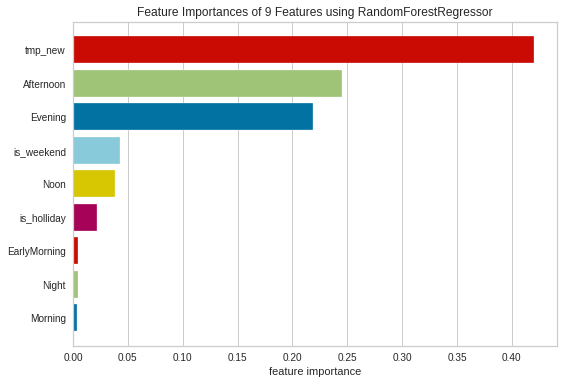

In [ ]:
from yellowbrick.model_selection import FeatureImportances
viz = FeatureImportances(seger_rf, labels=X3_list, relative=False)
viz.fit(X3, y3)
viz.show()

# בלי סגר - יערות רנדומים

In [ ]:
y4 = np.array(noseger['SMP'])
X4 = noseger.drop(['date','half_hour','SMP','hour_num','hour_cut'], axis = 1) 
X4_list = list(X4.columns)
X4 = np.array(X4)

In [ ]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.2, random_state = 28)

In [ ]:
noseger_rf = RandomForestRegressor(n_estimators = 100 ,max_depth=7, random_state = 0)
noseger_rf.fit(X4_train, y4_train)

RandomForestRegressor(max_depth=7, random_state=0)

In [ ]:
print("Target function std:")
y4_test.std()

Target function std:


23.21514417273142

In [ ]:
print("Target function std:")
y4_train.std()

Target function std:


23.705469537274826

In [ ]:
y4_pred_train = noseger_rf.predict(X4_train)
print("------ TRAIN DATA ------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_train, y4_pred_train)))

------ TRAIN DATA ------
RMSE: 17.275079253103492


In [ ]:
y4_pred = noseger_rf.predict(X4_test)
print("------ TEST DATA ------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, y4_pred)))

------ TEST DATA ------
RMSE: 17.277427106716257


In [ ]:
r2_score(y4_train, y4_pred_train)

0.4689407556072369

In [ ]:
r2_score(y4_test, y4_pred)

0.44612040176065826

In [ ]:
importances = list(noseger_rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X4_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: tmp_new              Importance: 0.57
Variable: Afternoon            Importance: 0.17
Variable: Evening              Importance: 0.13
Variable: Noon                 Importance: 0.06
Variable: is_weekend           Importance: 0.02
Variable: Night                Importance: 0.02
Variable: EarlyMorning         Importance: 0.02
Variable: Morning              Importance: 0.01
Variable: is_holliday          Importance: 0.0


# כל השנה - יערות רנדומים

In [ ]:
y5 = np.array(smp_tmp['SMP'])
X5 = smp_tmp.drop(['date','half_hour','SMP','hour_num','hour_cut'], axis=1)
X5_list = list(X5.columns)
X5 = np.array(X5)

In [ ]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size = 0.2, random_state = 28)

In [ ]:
smp_rf = RandomForestRegressor(n_estimators = 100, max_depth=7, random_state = 0)
smp_rf.fit(X5_train, y5_train)

RandomForestRegressor(max_depth=7, random_state=0)

In [ ]:
print("Target function std:")
y5_train.std()

Target function std:


23.650255919338285

In [ ]:
print("Target function std:")
y5_test.std()

Target function std:


24.190968740387845

In [ ]:
y5_pred_train = smp_rf.predict(X5_train)
print("------ TRAIN DATA ------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(y5_train, y5_pred_train)))

------ TRAIN DATA ------
RMSE: 17.005709567183


In [ ]:
y5_pred = smp_rf.predict(X5_test)
print("------ TEST DATA ------")
print('RMSE:', np.sqrt(metrics.mean_squared_error(y5_test, y5_pred)))

------ TEST DATA ------
RMSE: 17.96793787186237


In [ ]:
r2_score(y5_train, y5_pred_train)

0.48296752020657363

In [ ]:
r2_score(y5_test, y5_pred)

0.44831655222061917

In [ ]:
importances = list(smp_rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X5_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: tmp_new              Importance: 0.52
Variable: Evening              Importance: 0.18
Variable: Afternoon            Importance: 0.17
Variable: Noon                 Importance: 0.05
Variable: lockdown             Importance: 0.03
Variable: is_weekend           Importance: 0.02
Variable: Night                Importance: 0.01
Variable: EarlyMorning         Importance: 0.01
Variable: Morning              Importance: 0.01
Variable: is_holliday          Importance: 0.0
